# Load packages

In [1]:
import numpy as np 
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# 1 Load Dataset

In [2]:
df = pd.read_csv("countries of the world.csv")

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

# Convert to float
In summary, this code is used to convert specific columns with numeric data that are represented as strings in the DataFrame df into actual float data types. It skips columns listed in columns_to_skip and performs the transformation on other columns listed in columns_to_keep_as_int. The code ensures that numbers are formatted correctly and can be used for numerical operations.

In [6]:
columns_to_keep_as_int = ['Population', 'Area (sq. mi.)']
columns_to_skip = ['Region', 'Country'] + columns_to_keep_as_int

for col in df.columns:
    if col not in columns_to_skip and df[col].dtype == 'O':
        df[col] = df[col].str.replace(',', '').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

# fill missing values
In summary, this code is used to impute missing values in a DataFrame by replacing them with the mode (for the 'Climate' column) or the median (for other columns) of the same column within the specific region. This imputation strategy leverages the information from the same region to fill missing values, assuming that regions may have similar characteristics.

In [8]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_13411/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]
/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_13411/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]
/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_13411/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [9]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [10]:
df.shape

(227, 20)

# 3 Data Analysis Part

In [11]:
# Total number of regions
total_regions = df['Region'].nunique()

# Total number of countries
total_countries = df['Country'].nunique()

# Total number of countries per each region
countries_per_region = df['Region'].value_counts()

print("Total number of regions:", total_regions)
print("Total number of countries:", total_countries)
print("Total number of countries per each region:")
print(countries_per_region)


Total number of regions: 11
Total number of countries: 227
Total number of countries per each region:
Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: count, dtype: int64


# Average Regions GDP, Literacy, Agriculture

In [12]:
# Calculate the average for the specified columns by region
gdp_region_avg = round(df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].mean(),2)
gdp_region_avg

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),8053.57,795.54,124.29
BALTICS,11300.00,997.33,21.00
C.W. OF IND. STATES,4000.00,987.25,192.00
EASTERN EUROPE,9808.33,974.67,83.17
LATIN AMER. & CARIB,8682.22,907.30,57.02
NEAR EAST,10456.25,799.56,48.06
NORTHERN AFRICA,5550.00,677.00,134.50
NORTHERN AMERICA,26100.00,977.00,5.20
OCEANIA,8247.62,900.10,105.98


# Aggregate Data for each region
The result is a new DataFrame called region_data, where each region is represented by a single row with aggregated data for various attributes. This type of aggregation is common when you want to analyze data at a regional level, summarizing data for countries within each region.

In [13]:
# Define a function to join all countries' data within each region
def join_countries(data):
    return ', '.join(data.astype(str))

# Group the DataFrame by 'Region' and apply the join_countries function to aggregate country data
region_data = df.groupby('Region').agg({
    'Country': join_countries,
    'Population': 'sum',
    'Area (sq. mi.)': 'sum',
    'Pop. Density (per sq. mi.)': 'mean',
    'Coastline (coast/area ratio)': 'mean',
    'Net migration': 'mean',
    'Infant mortality (per 1000 births)': 'mean',
    'GDP ($ per capita)': 'mean',
    'Literacy (%)': 'mean',
    'Phones (per 1000)': 'mean',
    'Arable (%)': 'mean',
    'Crops (%)': 'mean',
    'Other (%)': 'mean',
    'Climate': join_countries,
    'Birthrate': 'mean',
    'Deathrate': 'mean',
    'Agriculture': 'mean',
    'Industry': 'mean',
    'Service': 'mean'
})

region_data

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),"Afghanistan , Bangladesh , Bhutan , Brunei , B...",3687982236,23096712,12648.250000,1792.678571,149.142857,3784.892857,8053.571429,795.535714,1672.428571,1266.035714,330.892857,7161.392857,"1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 15.0, 2.0, 2.0, ...",1688.285714,722.892857,124.285714,231.750000,386.714286
BALTICS,"Estonia , Latvia , Lithuania",7184974,175015,398.333333,311.666667,-203.333333,810.333333,11300.000000,997.333333,2928.666667,3031.000000,61.000000,6908.000000,"3.0, 3.0, 3.0",934.333333,1263.000000,21.000000,293.333333,475.666667
C.W. OF IND. STATES,"Armenia , Azerbaijan , Belarus , Georgia , Kaz...",280081548,22100843,567.083333,9.333333,-131.333333,3907.750000,4000.000000,987.250000,1638.500000,1475.916667,180.500000,7217.083333,"4.0, 1.0, 4.0, 3.0, 4.0, 25.0, 4.0, 4.0, 2.0, ...",1364.833333,969.666667,192.000000,299.500000,411.916667
EASTERN EUROPE,"Albania , Bosnia & Herzegovina , Bulgaria , Cr...",119914717,1152222,1009.000000,103.500000,-67.000000,1268.666667,9808.333333,974.666667,2807.500000,2633.250000,219.083333,6658.750000,"3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3...",950.833333,1028.666667,83.166667,283.000000,509.416667
LATIN AMER. & CARIB,"Anguilla , Antigua & Barbuda , Argentina , Aru...",561824599,20544084,1362.022222,1597.222222,-138.244444,1854.866667,8682.222222,907.300000,2705.766667,895.688889,428.755556,7167.777778,"2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 15.0, 2.0, ...",1777.511111,613.000000,57.022222,170.066667,415.288889
NEAR EAST,"Bahrain , Cyprus , Gaza Strip , Iraq , Israel ...",195068377,4355586,4270.812500,360.250000,256.000000,1991.812500,10456.250000,799.562500,2092.312500,956.937500,510.562500,7196.375000,"1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1...",2403.062500,388.125000,48.062500,343.562500,418.625000
NORTHERN AFRICA,"Algeria , Egypt , Libya , Morocco , Tunisia , ...",161407133,6018890,389.333333,31.833333,-42.500000,2108.666667,5550.000000,677.000000,1041.000000,743.500000,280.500000,7950.000000,"1.0, 1.0, 1.0, 1.0, 3.0, 1.0",2100.833333,486.000000,134.500000,315.666667,283.500000
NORTHERN AMERICA,"Bermuda , Canada , Greenland , St Pierre & Miq...",331672307,21782471,2608.600000,4964.000000,-27.400000,745.800000,26100.000000,977.000000,6867.400000,746.600000,4.800000,5288.600000,"2.0, 3.0, 1.0, 3.0, 3.0",1110.200000,629.000000,5.200000,181.400000,585.600000
OCEANIA,"American Samoa , Australia , Cook Islands , Fi...",33131662,8519812,1311.809524,10788.571429,-136.285714,1948.142857,8247.619048,900.095238,1898.857143,543.857143,1273.952381,5352.761905,"2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2...",2112.809524,518.142857,105.976190,163.095238,494.119048


# Top 15 Countries GDP per capita
The resulting bar plot visually compares the GDP per capita of the top 15 countries with the global average, allowing for easy identification of the wealthiest nations.

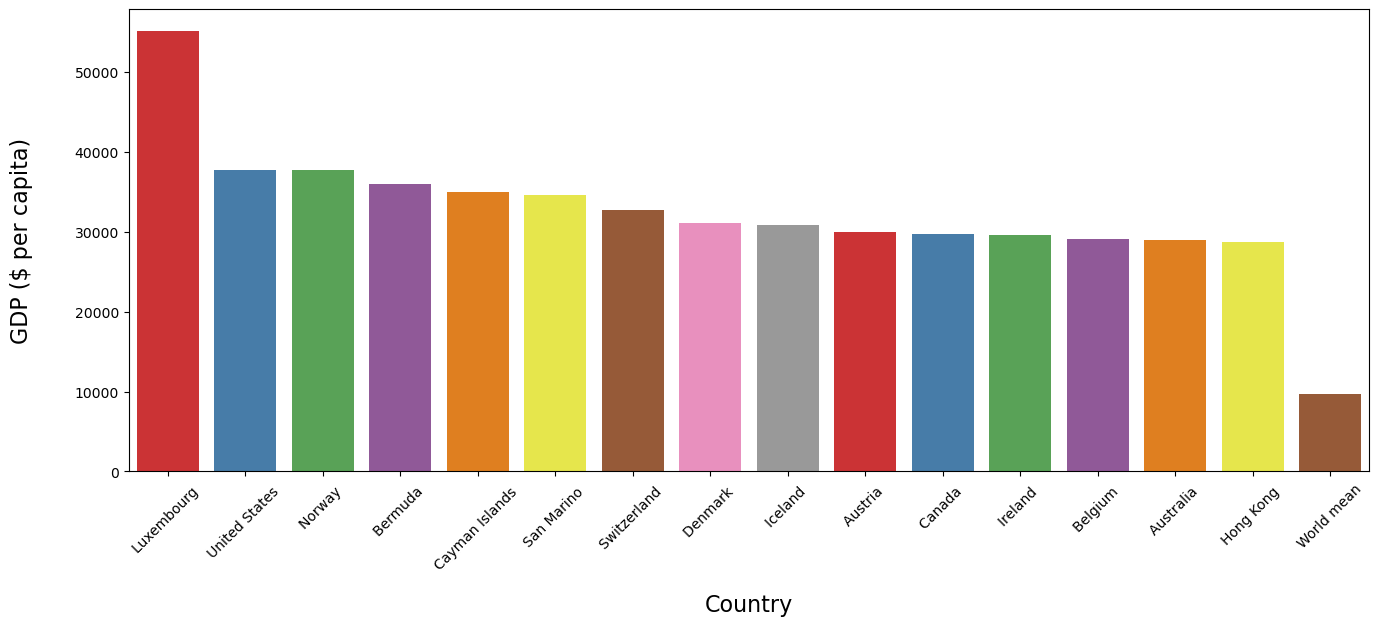

In [14]:
fig, ax= plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP ($ per capita)', ascending=False).head(15)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)': [df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']], mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data = gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=45)
plt.show()


# Top Five  Countries Literacy Rate and GDP for  Asia Region

In [15]:
top_five_asia_countries_literacy = df[df['Region'].str.strip() == 'ASIA (EX. NEAR EAST)'].nlargest(5,'Literacy (%)')
top_five_asia_countries_literacy = top_five_asia_countries_literacy[['Country','Literacy (%)','GDP ($ per capita)']]

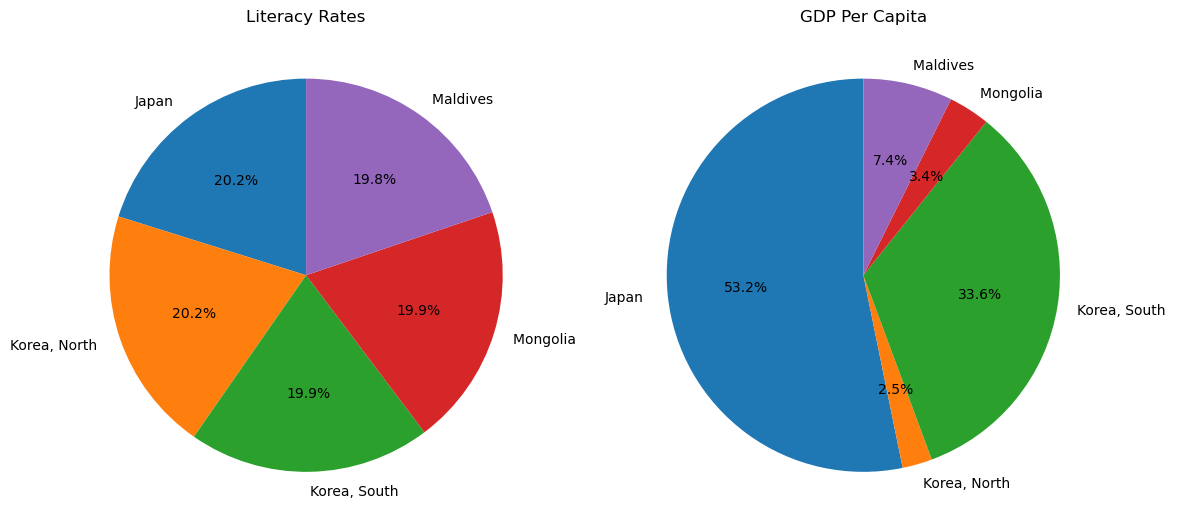

In [16]:
labels = top_five_asia_countries_literacy['Country']
literacy_rates = top_five_asia_countries_literacy['Literacy (%)']
gdp_values = top_five_asia_countries_literacy['GDP ($ per capita)']

fig,axes = plt.subplots(1,2,figsize=(12,6))


# Create a pie chart for literacy rates
axes[0].pie(literacy_rates, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Literacy Rates')

# Create a pie chart for GDP per capita
axes[1].pie(gdp_values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('GDP Per Capita')

plt.tight_layout()
plt.show()


# Top Fve Countries GDP Per each Region

/var/folders/xq/83w2r7w11d32vwchv5rsj7mc0000gn/T/ipykernel_13411/1110801430.py:43: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.5)


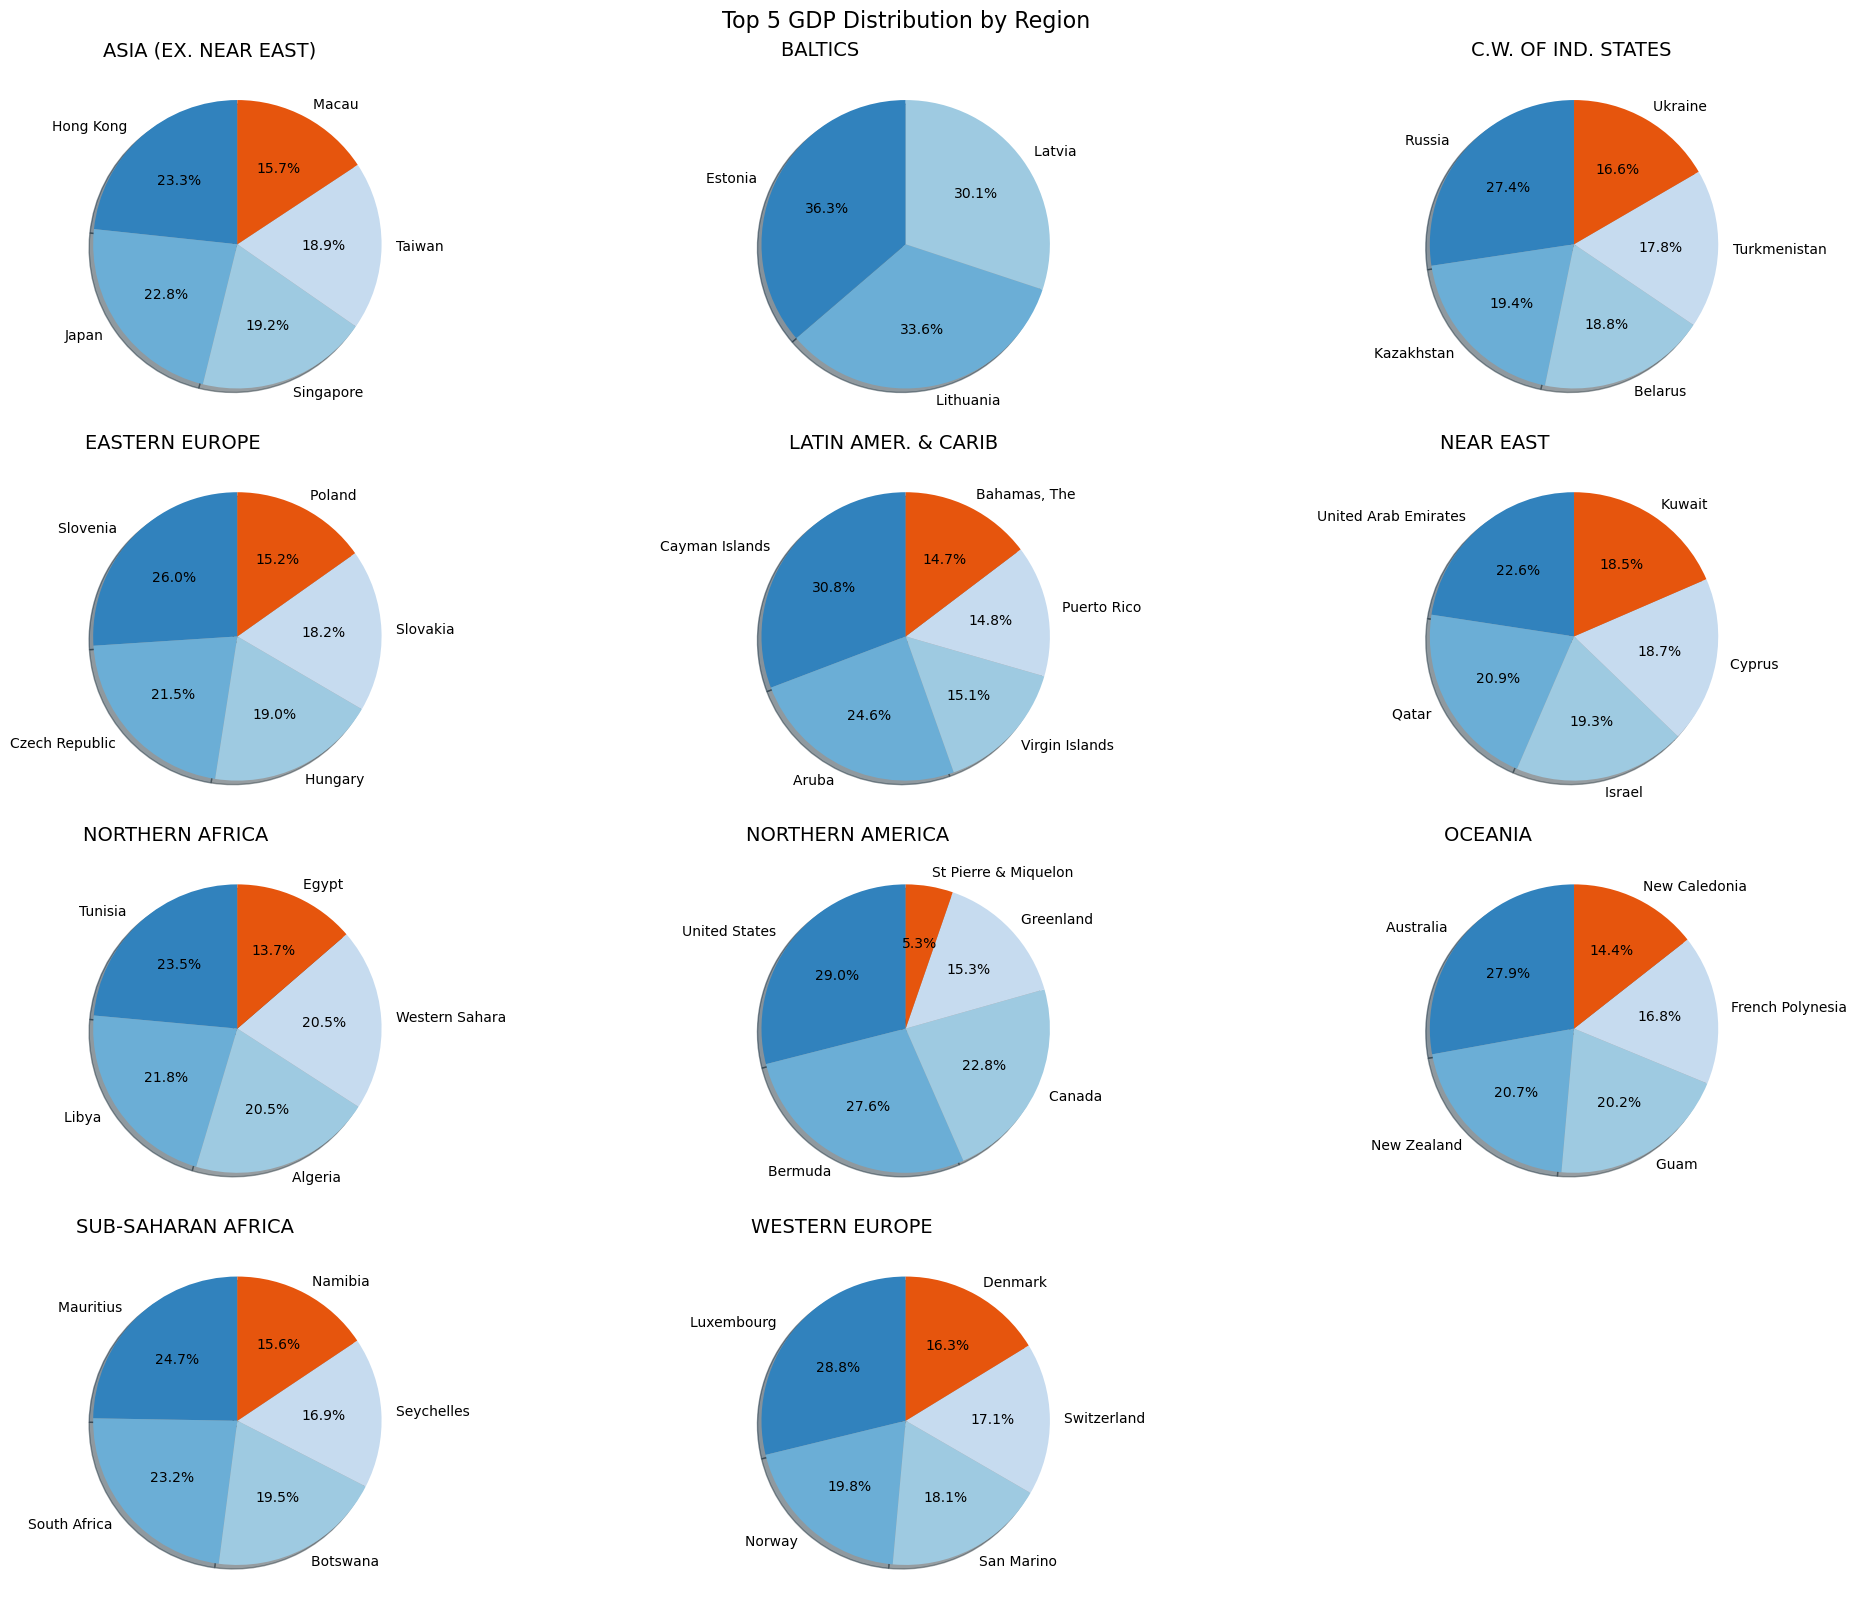

In [17]:
# Group the DataFrame by 'Region' and calculate the mean GDP for each region
region_gdp = df.groupby('Region')['GDP ($ per capita)'].mean()
# Get the regions and mean GDP values
regions = region_gdp.index
mean_gdp = region_gdp.values
# Calculate the number of subplots needed
num_subplots = len(regions)
num_cols = 3  # Set the number of columns for the grid
# Calculate the number of rows needed
num_rows = (num_subplots - 1) // num_cols + 1
# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.ravel()  # Flatten the 2D array of subplots
# Customize parameters for better readability and spacing
colors = plt.cm.tab20c(np.arange(20))
autopct = '%1.1f%%'
shadow = True
for i in range(num_subplots):
    ax = axes[i]
    # Get the countries in the current region
    countries = df[df['Region'] == regions[i]]
    # Calculate the top 5 countries with the highest GDP in the current region
    top_countries = countries.nlargest(5, 'GDP ($ per capita)')
    # Get the top 5 countries and their mean GDP values
    country_names = top_countries['Country']
    country_gdp = top_countries['GDP ($ per capita)']
    # Generate colors for the top 5 countries
    region_colors = colors[:len(country_names)]
    
    # Define explode based on the number of countries in the region
    explode = [0] * len(country_names)
    
    ax.pie(country_gdp, labels=country_names, autopct=autopct, startangle=90,
           colors=region_colors, shadow=shadow, explode=explode)
    ax.set_aspect('equal')  # Ensure the pie is drawn as a circle
    ax.set_title(f'{regions[i]}', fontsize=14)
    
# Hide any remaining empty subplots
for i in range(num_subplots, num_cols * num_rows):
    fig.delaxes(axes[i])

# Add some space between the plots
plt.subplots_adjust(wspace=0.5)

# Show the pie charts
plt.suptitle("Top 5 GDP Distribution by Region", fontsize=16)
plt.show()


# Correlation

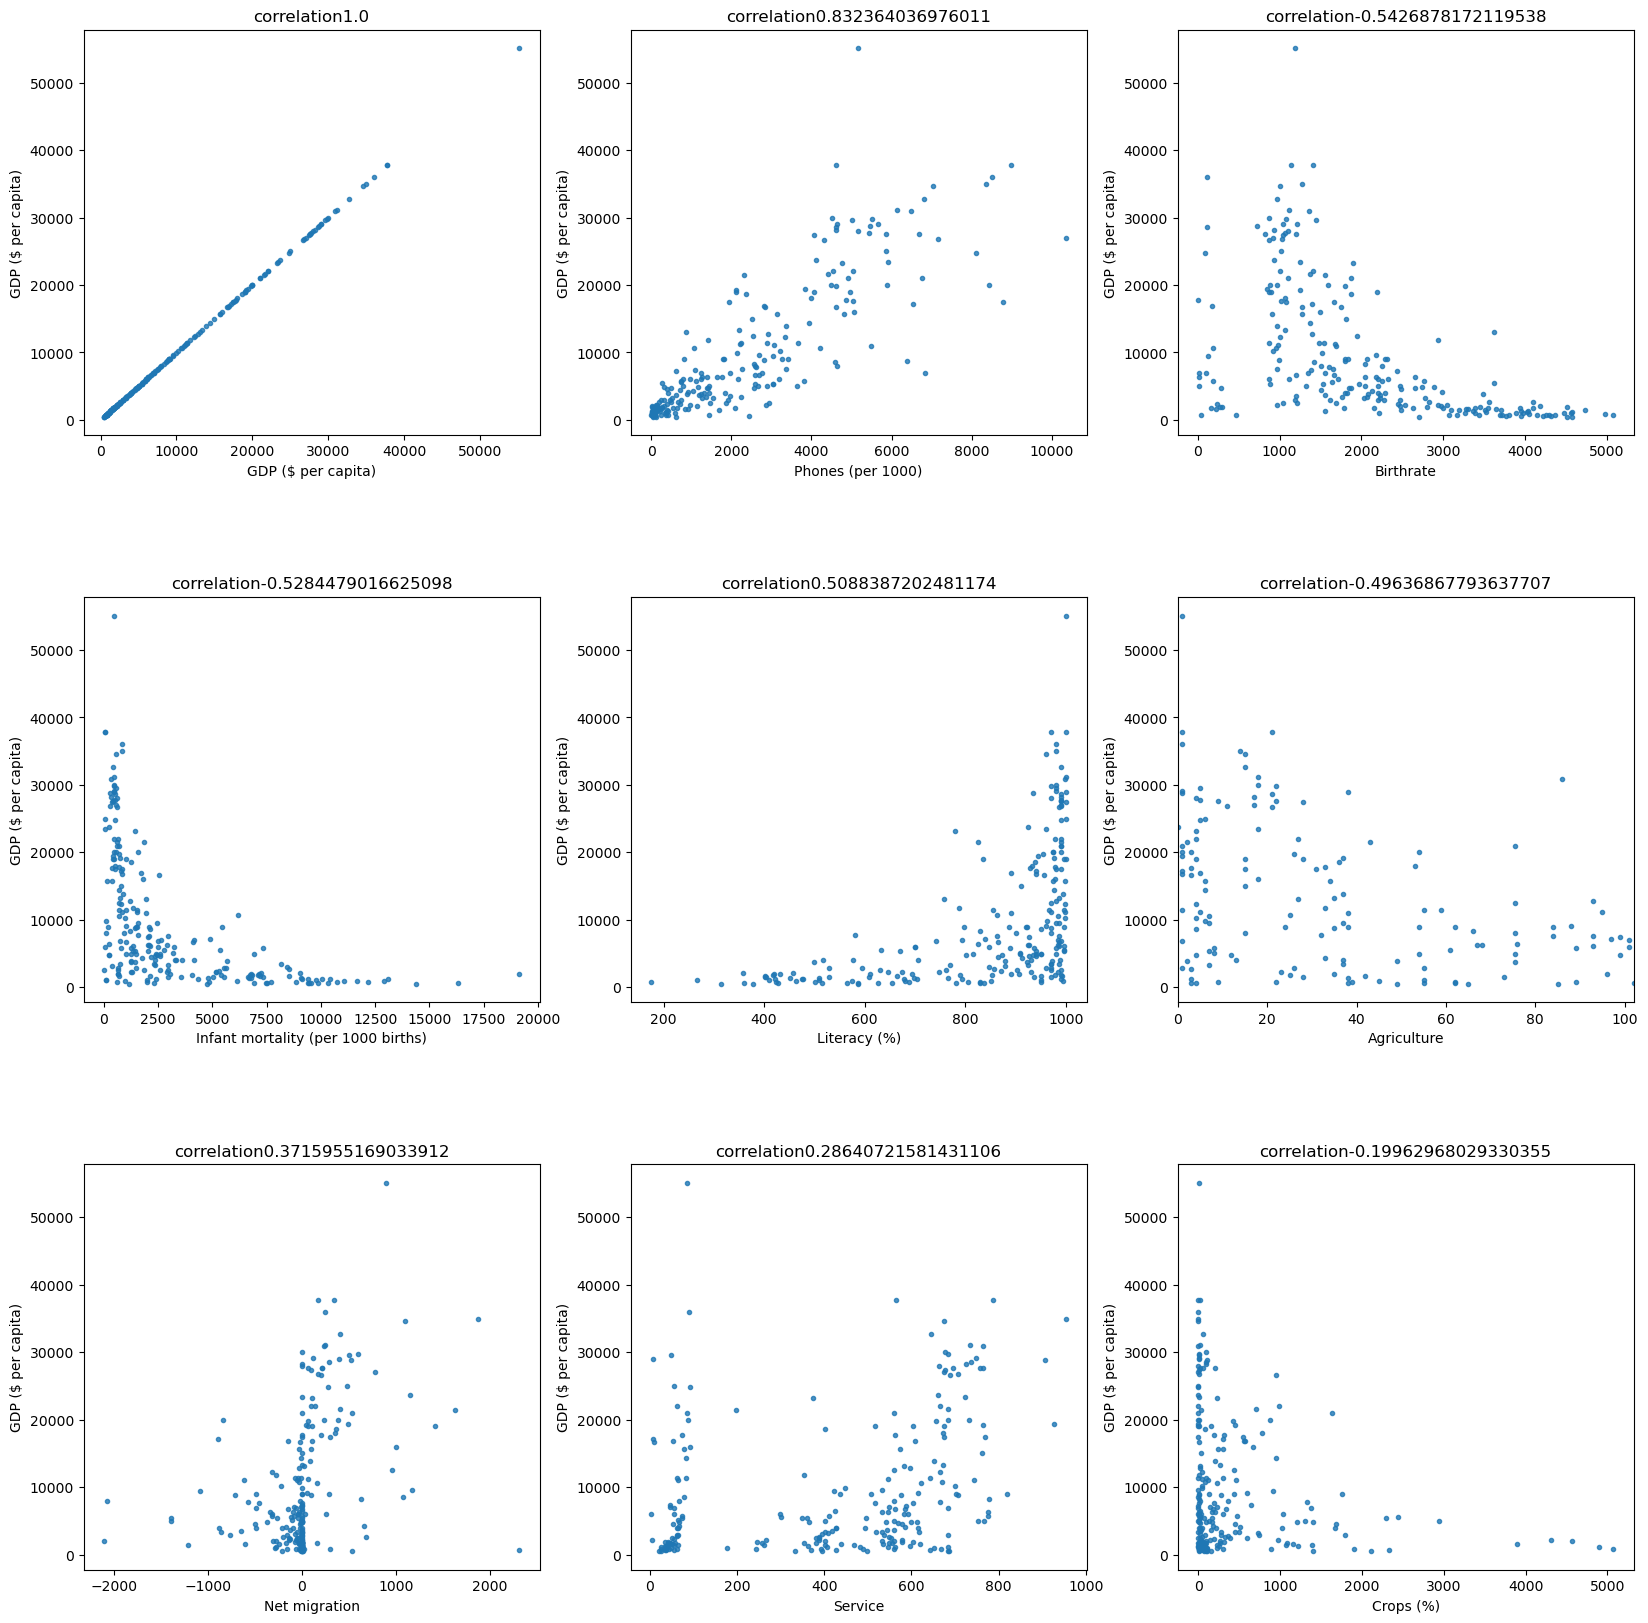

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!="GDP ($ per capita") & (col!="Climate")):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df, ax=axes[i,j],fit_reg=False, marker='.')
        title = "correlation"+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

# 4. Modeling

Training and testing

First label encode the categorical features 'Regrion' and 'Climate', and while just use all features given in the dataset without further enginerring.

In [19]:
LE = LabelEncoder()
df['Regional_label'] = LE.fit_transform(df['Region'])

In [20]:
X = df.drop(['Country','Region','GDP ($ per capita)'],axis=1)
y = df['GDP ($ per capita)']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [22]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((158, 18), (69, 18), (158,), (69,))

# 1 Linear Regresion

In [23]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_pred_y = model_lr.predict(X_train)
test_pred_y = model_lr.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)

# Matrices

In [24]:
from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))

train score : 0.7659287097773805
test score : 0.7128521817773061
rmse_train : 4464.481830154524
msle_train : 5.292744498701622
rmse_test : 5805.147900384778
msle_test : 6.5770171596219695


# Predictive System

In [25]:
input_data = X_test.iloc[10].values.reshape(1, -1)
model_lr.predict(input_data)

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28974.32853418])

In [26]:

y_test.iloc[10]

30900.0

# 2 Random Forest

In [27]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
train_pred_y = model_rf.predict(X_train)
test_pred_y = model_rf.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)

In [28]:
from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))

train score : 0.9712787511983328
test score : 0.7471073415102863
rmse_train : 1682.6523329011616
msle_train : 0.09495588890800667
rmse_test : 5439.2635184543515
msle_test : 0.30093840300558805


In [29]:
model_rf.predict(X_train.iloc[10].values.reshape(1,-1))

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1007.])

In [30]:
y_train.iloc[10]

1000.0

# 3 Decision Tree Regressor

In [31]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train,y_train)
train_pred_y = model_dtr.predict(X_train)
test_pred_y = model_dtr.predict(X_test)
train_pred_y = pd.Series(train_pred_y.clip(0,train_pred_y.max()), index=y_train.index)
test_pred_y = pd.Series(test_pred_y.clip(0,test_pred_y.max()), index=y_test.index)

from sklearn.metrics import r2_score
print("train score :", r2_score(train_pred_y,y_train))
print('test score :',r2_score(test_pred_y,y_test))
print("rmse_train :",np.sqrt(mean_squared_error(train_pred_y,y_train)))
print("msle_train :", mean_squared_log_error(train_pred_y,y_train))
print("rmse_test :", np.sqrt(mean_squared_error(test_pred_y,y_test)))
print("msle_test :", mean_squared_log_error(test_pred_y,y_test))

train score : 1.0
test score : 0.5899775366761523
rmse_train : 0.0
msle_train : 0.0
rmse_test : 7878.699958970278
msle_test : 0.5013624040946457


In [32]:
model_dtr.predict(X_train.iloc[11].values.reshape(1,-1))

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([27600.])

In [33]:

y_train.iloc[11]

27600.0

In [34]:
X_train.iloc[11].values

array([6.0876136e+07, 5.4703000e+05, 1.1130000e+03, 6.3000000e+01,
       6.6000000e+01, 4.2600000e+02, 9.9000000e+02, 5.8640000e+03,
       3.3530000e+03, 2.0700000e+02, 6.4400000e+02, 4.0000000e+00,
       1.1990000e+03, 9.1400000e+02, 2.2000000e+01, 2.1400000e+02,
       7.6400000e+02, 1.0000000e+01])

In [35]:
X_train.iloc[121].values

array([7.87584e+05, 2.51700e+03, 3.12900e+03, 8.22000e+02, 0.00000e+00,
       7.78000e+02, 8.89000e+02, 3.80900e+03, 1.36000e+02, 1.20000e+01,
       8.52000e+02, 2.00000e+00, 1.89000e+02, 5.49000e+02, 8.00000e+00,
       1.90000e+01, 7.30000e+01, 9.00000e+00])

# Save model

In [36]:
import pickle
pickle.dump(model_dtr,open('model_dtr.pkl','wb'))

In [37]:
import sklearn
print(sklearn.__version__)

1.3.0


In [38]:
zz=np.array([1095351995, 3287590, 3332, 21, -7, 5629, 2900, 595, 454, 544, 274, 4286, 25, 2201, 818, 186, 276, 538])


In [39]:
zz=pd.DataFrame(zz)

In [40]:
zz.describe()

,0
count,1.800000e+01
mean,6.103676e+07
std,2.581322e+08
min,-7.000000e+00
25%,2.745000e+02
50%,5.695000e+02
75%,3.224000e+03
max,1.095352e+09


India - 1095351995, 3287590, 3332, 21, -7, 5629, 2900, 595, 454, 544, 274, 4286, 25, 2201, 818, 186, 276, 538
afghanistan- 31056997, 647500, 480, 0, 2306, 16307, 700, 360, 32, 1213, 22, 8765, 1, 466, 2034, 38, 24, 38
denmark - 5450661, 43094, 1265, 1697, 248, 456, 31100, 1000, 6146, 5402, 19, 4579, 3, 1113, 1036, 18, 246, 735
Australia - 20264082, 7686850, 26, 34, 398, 469, 29000, 1000, 5655, 655, 4, 9341, 1, 1214, 751, 38, 262, 7